In [112]:
import urllib
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

In [115]:
matplotlib.rc('font', family='Malgun Gothic', size=10)
matplotlib.rcParams['axes.unicode_minus'] = False

In [116]:
key = '59677244646c65653130357768594e77'
service = 'StationDayTrnsitNmpr'
url = 'http://openapi.seoul.go.kr:8088/{}/json/{}/1/44/'.format(auth_key, service)
req = urllib.request.urlopen(url)
data = json.load(req)[service]

In [117]:
# list_total_count : 총 데이터 건수
# RESULT.CODE : 요청결과 코드
# RESULT.MESSAGE : 요청결과 메시지
# SN : 순번
# STATN_NM : 역명
# WKDAY : 평일
# SATDAY : 토요일
# SUNDAY : 일요일

In [118]:
df = pd.DataFrame(data['row'])
df = df[['SN', 'STATN_NM', 'WKDAY', 'SATDAY', 'SUNDAY']]
df.columns = ['순위', '역명', '평일', '토요일', '일요일']
df.head()

,순위,역명,평일,토요일,일요일
0,1,신도림,333873.0,298987.0,216886.0
1,2,동대문역사문화공원,251049.0,211456.0,150589.0
2,3,충무로,229882.0,194865.0,142150.0
3,4,종로3가,224539.0,196606.0,142525.0
4,5,사당,200985.0,180230.0,134354.0


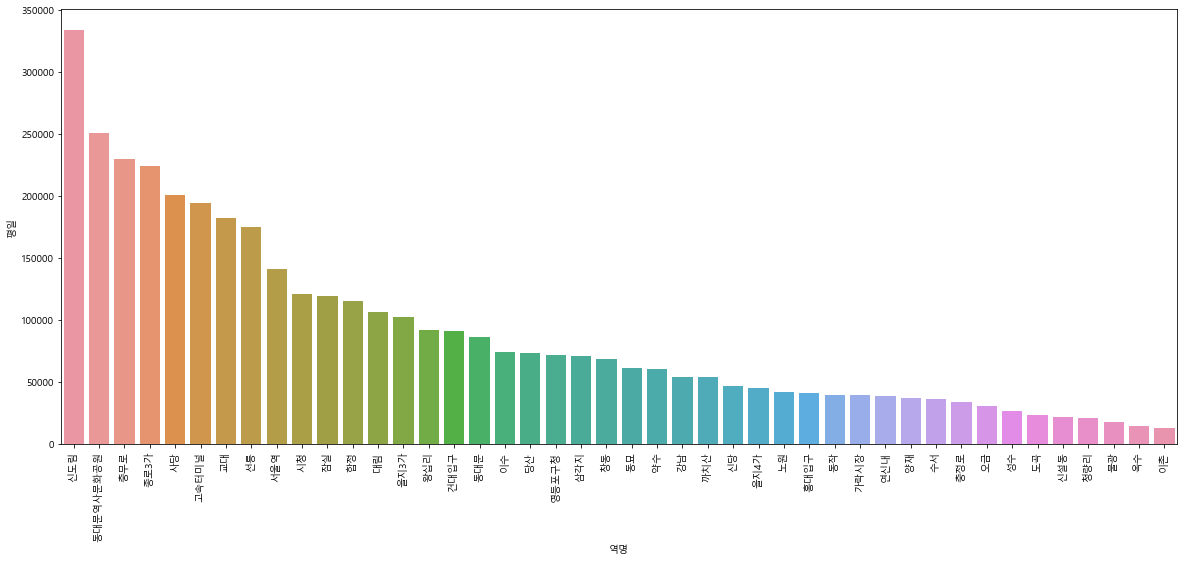

In [143]:
plt.figure(figsize=(20,8))
sns.barplot(x='역명', y='평일', data=df)
plt.xticks(rotation=90)
plt.show()

In [169]:
df2 = pd.melt(df, id_vars='역명', value_vars=['평일', '토요일', '일요일'])
df2.columns = ['역명', '구분', '환승인원']
df2['환승인원비중'] = df2.groupby('구분')['환승인원'].apply(lambda x: 100*x/x.sum())
df2.head()

,역명,구분,환승인원,환승인원비중
0,신도림,평일,333873.0,8.486468
1,동대문역사문화공원,평일,251049.0,6.381226
2,충무로,평일,229882.0,5.843198
3,종로3가,평일,224539.0,5.707389
4,사당,평일,200985.0,5.108687


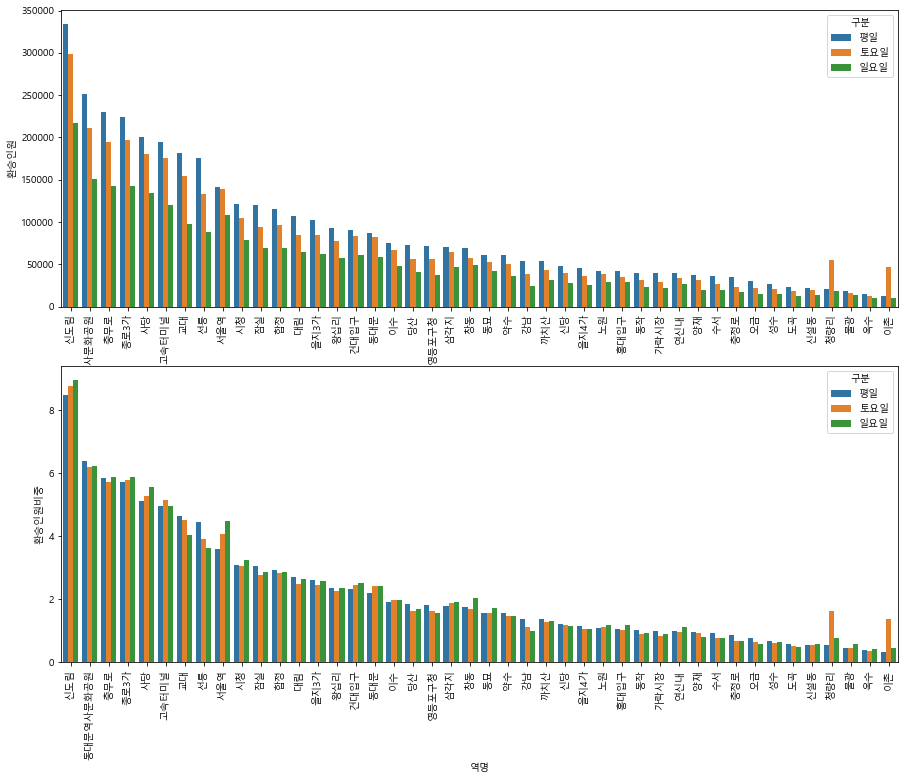

In [226]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
sns.barplot(x='역명', y='환승인원', hue='구분', data=df2)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.barplot(x='역명', y='환승인원비중', hue='구분', data=df2)
plt.xticks(rotation=90)

plt.show()